In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from tqdm import tqdm
import pop_tools

def pop_find_lat_ind(loc, LATDAT):
    return np.abs(LATDAT[:, 0].values - loc).argmin()

def pop_find_lon_ind(loc, LONDAT, direction="w"):
    if direction.lower() in ["east", "e"]:
        value = loc
    elif direction.lower() in ["west", "w"]:
        value = 360 - loc
    else:
        print("I do not know which direction.")
    return np.nanargmin(np.abs(LONDAT[0, :].values - value))


In [2]:
# open sample data
ds_dia = xr.open_dataset('E:\\NCAR\\01.DIA.nc')
ds_hdifb = xr.open_dataset('E:\\NCAR\\01.HDIFB.nc')
ds_hdife = xr.open_dataset('E:\\NCAR\\01.HDIFE.nc')
ds_hdifn = xr.open_dataset('E:\\NCAR\\01.HDIFN.nc')
ds_kpp = xr.open_dataset('E:\\NCAR\\01.KPP.nc')
ds_qsw = xr.open_dataset('E:\\NCAR\\01.QSW.nc')
ds_shf = xr.open_dataset('E:\\NCAR\\01.SHF.nc')
ds_shf_qsw = xr.open_dataset('E:\\NCAR\\01.SHF_QSW.nc')
ds_uet = xr.open_dataset('E:\\NCAR\\01.UET.nc')
ds_vnt = xr.open_dataset('E:\\NCAR\\01.VNT.nc')
ds_wtt = xr.open_dataset('E:\\NCAR\\01.WTT.nc')
ds_temp = xr.open_dataset('E:\\NCAR\\01.TEMP.nc')
ds_temp1 = xr.open_dataset('E:\\NCAR\\TEMP\\b.e11.BRCP85C5CNBDRD.f09_g16.001.pop.h.TEMP.208101-210012.nc')

In [3]:
# get lola inds from somewhere for indexing later on
lola_inds = {}
inds_lat = range(-89, 90, 1)
for j in inds_lat:
    if j < 0:
        lola_inds["j_" + str(j)[1:] + "s"] = pop_find_lat_ind(j, ds_temp.TLAT)
    else:
        lola_inds["j_" + str(j) + "n"] = pop_find_lat_ind(j, ds_temp.TLAT)

inds_lon = range(0, 360, 1)
for i in inds_lon:
    lola_inds["i_" + str(i) + "_w"] = pop_find_lon_ind(i, ds_temp.TLONG)

In [4]:
DZT = np.zeros((60,384,320))
for k in range(60):
            DZT[k,:,:] = ds_temp.dz[k]

ds2 = xr.Dataset()
ds2 = xr.Dataset({'DZT': (['z_t','nlat','nlon',], DZT.data),
                   'DZU': (['z_t','nlat','nlon'], DZT.data)},
                    coords={'TLAT': (['nlat','nlon'],ds_temp.TLAT.data),
                            'TLONG': (['nlat','nlon'],ds_temp.TLONG.data),
                            'ULAT': (['nlat','nlon'],ds_temp.ULAT.data),
                            'ULONG': (['nlat','nlon'],ds_temp.ULONG.data),
                            'z_t': (['z_t'],ds_temp.z_t.data)})

In [30]:
tend_temp = np.diff(ds_temp.TEMP,axis=0)/(3600*24*30)

TEND_TEMP = xr.Dataset()
TEND_TEMP = xr.Dataset({'TEND_TEMP': (['t','z_t','nlat','nlon',], tend_temp.data)},
                         coords={'TLAT': (['nlat','nlon'],ds_temp.TLAT.data),
                                 'TLONG': (['nlat','nlon'],ds_temp.TLONG.data),
                                 'z_t': (['z_t'],ds_temp.z_t.data),
                                 't': (['t'],ds_temp.time.data[0:12])})
ds_temp["TEND_TEMP"] = TEND_TEMP.TEND_TEMP

In [31]:
ds_dia["DZT"] = ds2.DZT
ds_dia["DZU"] = ds2.DZU

ds_dia.DZT.attrs["long_name"] = "Thickness of T cells"
ds_dia.DZT.attrs["units"] = "centimeter"
ds_dia.DZT.attrs["grid_loc"] = "3111"
ds_dia.DZU.attrs["long_name"] = "Thickness of U cells"
ds_dia.DZU.attrs["units"] = "centimeter"
ds_dia.DZU.attrs["grid_loc"] = "3221"

ds_hdifb["DZT"] = ds2.DZT
ds_hdifb["DZU"] = ds2.DZU

ds_hdifb.DZT.attrs["long_name"] = "Thickness of T cells"
ds_hdifb.DZT.attrs["units"] = "centimeter"
ds_hdifb.DZT.attrs["grid_loc"] = "3111"
ds_hdifb.DZU.attrs["long_name"] = "Thickness of U cells"
ds_hdifb.DZU.attrs["units"] = "centimeter"
ds_hdifb.DZU.attrs["grid_loc"] = "3221"

ds_hdife["DZT"] = ds2.DZT
ds_hdife["DZU"] = ds2.DZU

ds_hdife.DZT.attrs["long_name"] = "Thickness of T cells"
ds_hdife.DZT.attrs["units"] = "centimeter"
ds_hdife.DZT.attrs["grid_loc"] = "3111"
ds_hdife.DZU.attrs["long_name"] = "Thickness of U cells"
ds_hdife.DZU.attrs["units"] = "centimeter"
ds_hdife.DZU.attrs["grid_loc"] = "3221"

ds_hdifn["DZT"] = ds2.DZT
ds_hdifn["DZU"] = ds2.DZU

ds_hdifn.DZT.attrs["long_name"] = "Thickness of T cells"
ds_hdifn.DZT.attrs["units"] = "centimeter"
ds_hdifn.DZT.attrs["grid_loc"] = "3111"
ds_hdifn.DZU.attrs["long_name"] = "Thickness of U cells"
ds_hdifn.DZU.attrs["units"] = "centimeter"
ds_hdifn.DZU.attrs["grid_loc"] = "3221"

ds_kpp["DZT"] = ds2.DZT
ds_kpp["DZU"] = ds2.DZU

ds_kpp.DZT.attrs["long_name"] = "Thickness of T cells"
ds_kpp.DZT.attrs["units"] = "centimeter"
ds_kpp.DZT.attrs["grid_loc"] = "3111"
ds_kpp.DZU.attrs["long_name"] = "Thickness of U cells"
ds_kpp.DZU.attrs["units"] = "centimeter"
ds_kpp.DZU.attrs["grid_loc"] = "3221"

ds_qsw["DZT"] = ds2.DZT
ds_qsw["DZU"] = ds2.DZU

ds_qsw.DZT.attrs["long_name"] = "Thickness of T cells"
ds_qsw.DZT.attrs["units"] = "centimeter"
ds_qsw.DZT.attrs["grid_loc"] = "3111"
ds_qsw.DZU.attrs["long_name"] = "Thickness of U cells"
ds_qsw.DZU.attrs["units"] = "centimeter"
ds_qsw.DZU.attrs["grid_loc"] = "3221"

ds_shf["DZT"] = ds2.DZT
ds_shf["DZU"] = ds2.DZU

ds_shf.DZT.attrs["long_name"] = "Thickness of T cells"
ds_shf.DZT.attrs["units"] = "centimeter"
ds_shf.DZT.attrs["grid_loc"] = "3111"
ds_shf.DZU.attrs["long_name"] = "Thickness of U cells"
ds_shf.DZU.attrs["units"] = "centimeter"
ds_shf.DZU.attrs["grid_loc"] = "3221"

ds_shf_qsw["DZT"] = ds2.DZT
ds_shf_qsw["DZU"] = ds2.DZU

ds_shf_qsw.DZT.attrs["long_name"] = "Thickness of T cells"
ds_shf_qsw.DZT.attrs["units"] = "centimeter"
ds_shf_qsw.DZT.attrs["grid_loc"] = "3111"
ds_shf_qsw.DZU.attrs["long_name"] = "Thickness of U cells"
ds_shf_qsw.DZU.attrs["units"] = "centimeter"
ds_shf_qsw.DZU.attrs["grid_loc"] = "3221"

ds_uet["DZT"] = ds2.DZT
ds_uet["DZU"] = ds2.DZU

ds_uet.DZT.attrs["long_name"] = "Thickness of T cells"
ds_uet.DZT.attrs["units"] = "centimeter"
ds_uet.DZT.attrs["grid_loc"] = "3111"
ds_uet.DZU.attrs["long_name"] = "Thickness of U cells"
ds_uet.DZU.attrs["units"] = "centimeter"
ds_uet.DZU.attrs["grid_loc"] = "3221"

ds_vnt["DZT"] = ds2.DZT
ds_vnt["DZU"] = ds2.DZU

ds_vnt.DZT.attrs["long_name"] = "Thickness of T cells"
ds_vnt.DZT.attrs["units"] = "centimeter"
ds_vnt.DZT.attrs["grid_loc"] = "3111"
ds_vnt.DZU.attrs["long_name"] = "Thickness of U cells"
ds_vnt.DZU.attrs["units"] = "centimeter"
ds_vnt.DZU.attrs["grid_loc"] = "3221"

ds_wtt["DZT"] = ds2.DZT
ds_wtt["DZU"] = ds2.DZU

ds_wtt.DZT.attrs["long_name"] = "Thickness of T cells"
ds_wtt.DZT.attrs["units"] = "centimeter"
ds_wtt.DZT.attrs["grid_loc"] = "3111"
ds_wtt.DZU.attrs["long_name"] = "Thickness of U cells"
ds_wtt.DZU.attrs["units"] = "centimeter"
ds_wtt.DZU.attrs["grid_loc"] = "3221"

ds_temp["DZT"] = ds2.DZT
ds_temp["DZU"] = ds2.DZU

ds_temp.DZT.attrs["long_name"] = "Thickness of T cells"
ds_temp.DZT.attrs["units"] = "centimeter"
ds_temp.DZT.attrs["grid_loc"] = "3111"
ds_temp.DZU.attrs["long_name"] = "Thickness of U cells"
ds_temp.DZU.attrs["units"] = "centimeter"
ds_temp.DZU.attrs["grid_loc"] = "3221"

ds_temp1["DZT"] = ds2.DZT
ds_temp1["DZU"] = ds2.DZU

ds_temp1.DZT.attrs["long_name"] = "Thickness of T cells"
ds_temp1.DZT.attrs["units"] = "centimeter"
ds_temp1.DZT.attrs["grid_loc"] = "3111"
ds_temp1.DZU.attrs["long_name"] = "Thickness of U cells"
ds_temp1.DZU.attrs["units"] = "centimeter"
ds_temp1.DZU.attrs["grid_loc"] = "3221"

In [32]:
# make sure we have the cell volumne for calculations
VOL = (ds_temp.DZT * ds_temp.DXT * ds_temp.DYT).compute()
KMT = ds_temp.KMT.compute()

for j in tqdm(range(len(KMT.nlat))):
    for i in range(len(KMT.nlon)):
        k = KMT.values[j, i].astype(int)
        VOL.values[k:, j, i] = 0.0


100%|██████████████████████████████████████████████████████████████████████████████| 384/384 [00:00<00:00, 1586.70it/s]


In [33]:
ds_temp["VOL"] = VOL

ds_temp.VOL.attrs["long_name"] = "volume of T cells"
ds_temp.VOL.attrs["units"] = "centimeter^3"
ds_temp.VOL.attrs["grid_loc"] = "3111"

In [34]:
budget = xr.Dataset()
metrics = {
    ("X",): ["DXU", "DXT"],  # X distances
    ("Y",): ["DYU", "DYT"],  # Y distances
    ("Z",): ["DZU", "DZT"],  # Z distances
    ("X", "Y"): ["UAREA", "TAREA"],
}

In [10]:
%%time

gridxgcm_dia, dsxgcm_dia = pop_tools.to_xgcm_grid_dataset(
    ds_dia,
    periodic=False,
    metrics=metrics,
    boundary={"X": "extend", "Y": "extend", "Z": "extend"},
)
for coord in ["nlat", "nlon"]:
    if coord in dsxgcm_dia.coords:
        dsxgcm_dia = dsxgcm_dia.drop_vars(coord)
        
gridxgcm_hdifb, dsxgcm_hdifb = pop_tools.to_xgcm_grid_dataset(
    ds_hdifb,
    periodic=False,
    metrics=metrics,
    boundary={"X": "extend", "Y": "extend", "Z": "extend"},
)
for coord in ["nlat", "nlon"]:
    if coord in dsxgcm_hdifb.coords:
        dsxgcm_hdifb = dsxgcm_hdifb.drop_vars(coord)        
        
gridxgcm_hdife, dsxgcm_hdife = pop_tools.to_xgcm_grid_dataset(
    ds_hdife,
    periodic=False,
    metrics=metrics,
    boundary={"X": "extend", "Y": "extend", "Z": "extend"},
)
for coord in ["nlat", "nlon"]:
    if coord in dsxgcm_hdife.coords:
        dsxgcm_hdife = dsxgcm_hdife.drop_vars(coord)        
        
        
gridxgcm_hdifn, dsxgcm_hdifn = pop_tools.to_xgcm_grid_dataset(
    ds_hdifn,
    periodic=False,
    metrics=metrics,
    boundary={"X": "extend", "Y": "extend", "Z": "extend"},
)
for coord in ["nlat", "nlon"]:
    if coord in dsxgcm_hdifn.coords:
        dsxgcm_hdifn = dsxgcm_hdifn.drop_vars(coord)        
        
        
gridxgcm_kpp, dsxgcm_kpp = pop_tools.to_xgcm_grid_dataset(
    ds_kpp,
    periodic=False,
    metrics=metrics,
    boundary={"X": "extend", "Y": "extend", "Z": "extend"},
)
for coord in ["nlat", "nlon"]:
    if coord in dsxgcm_kpp.coords:
        dsxgcm_kpp = dsxgcm_kpp.drop_vars(coord)        
        
gridxgcm_qsw, dsxgcm_qsw = pop_tools.to_xgcm_grid_dataset(
    ds_qsw,
    periodic=False,
    metrics=metrics,
    boundary={"X": "extend", "Y": "extend", "Z": "extend"},
)
for coord in ["nlat", "nlon"]:
    if coord in dsxgcm_qsw.coords:
        dsxgcm_qsw = dsxgcm_qsw.drop_vars(coord)       

gridxgcm_shf, dsxgcm_shf = pop_tools.to_xgcm_grid_dataset(
    ds_shf,
    periodic=False,
    metrics=metrics,
    boundary={"X": "extend", "Y": "extend", "Z": "extend"},
)
for coord in ["nlat", "nlon"]:
    if coord in dsxgcm_shf.coords:
        dsxgcm_shf = dsxgcm_shf.drop_vars(coord) 
        
gridxgcm_shf_qsw, dsxgcm_shf_qsw = pop_tools.to_xgcm_grid_dataset(
    ds_shf_qsw,
    periodic=False,
    metrics=metrics,
    boundary={"X": "extend", "Y": "extend", "Z": "extend"},
)
for coord in ["nlat", "nlon"]:
    if coord in dsxgcm_shf_qsw.coords:
        dsxgcm_shf_qsw = dsxgcm_shf_qsw.drop_vars(coord) 

gridxgcm_uet, dsxgcm_uet = pop_tools.to_xgcm_grid_dataset(
    ds_uet,
    periodic=False,
    metrics=metrics,
    boundary={"X": "extend", "Y": "extend", "Z": "extend"},
)
for coord in ["nlat", "nlon"]:
    if coord in dsxgcm_uet.coords:
        dsxgcm_uet = dsxgcm_uet.drop_vars(coord) 
        
gridxgcm_vnt, dsxgcm_vnt = pop_tools.to_xgcm_grid_dataset(
    ds_vnt,
    periodic=False,
    metrics=metrics,
    boundary={"X": "extend", "Y": "extend", "Z": "extend"},
)
for coord in ["nlat", "nlon"]:
    if coord in dsxgcm_vnt.coords:
        dsxgcm_vnt = dsxgcm_vnt.drop_vars(coord) 
        
gridxgcm_wtt, dsxgcm_wtt = pop_tools.to_xgcm_grid_dataset(
    ds_wtt,
    periodic=False,
    metrics=metrics,
    boundary={"X": "extend", "Y": "extend", "Z": "extend"},
)
for coord in ["nlat", "nlon"]:
    if coord in dsxgcm_wtt.coords:
        dsxgcm_wtt = dsxgcm_wtt.drop_vars(coord) 
        
        


CPU times: total: 7.58 s
Wall time: 1min 34s


In [35]:
gridxgcm_temp, dsxgcm_temp = pop_tools.to_xgcm_grid_dataset(
    ds_temp,
    periodic=False,
    metrics=metrics,
    boundary={"X": "extend", "Y": "extend", "Z": "extend"},
)
for coord in ["nlat", "nlon"]:
    if coord in dsxgcm_temp.coords:
        dsxgcm_temp = dsxgcm_temp.drop_vars(coord) 

In [36]:
%%time
gridxgcm_temp1, dsxgcm_temp1 = pop_tools.to_xgcm_grid_dataset(
    ds_temp1,
    periodic=False,
    metrics=metrics,
    boundary={"X": "extend", "Y": "extend", "Z": "extend"},
)
for coord in ["nlat", "nlon"]:
    if coord in dsxgcm_temp1.coords:
        dsxgcm_temp1 = dsxgcm_temp1.drop_vars(coord) 

CPU times: total: 29.1 s
Wall time: 29.1 s


In [37]:
%%time
budget["UET"] = -(gridxgcm_uet.diff(dsxgcm_uet.UET * dsxgcm_temp.VOL.values, axis="X") / dsxgcm_temp.VOL)
budget["VNT"] = -(gridxgcm_vnt.diff(dsxgcm_vnt.VNT * dsxgcm_temp.VOL.values, axis="Y") / dsxgcm_temp.VOL)
budget["WTT"] = (
    gridxgcm_wtt.diff(dsxgcm_wtt.WTT.fillna(0) * (dsxgcm_temp.dz * dsxgcm_temp.DXT * dsxgcm_temp.DYT).values, axis="Z")
    / dsxgcm_temp.VOL
)

budget["TOT_ADV"] = budget["UET"] + budget["VNT"] + budget["WTT"]

CPU times: total: 3.17 s
Wall time: 3.15 s


In [38]:
%%time
budget["DIA_IMPVF_TEMP"] = -(
    gridxgcm_dia.diff(dsxgcm_dia.DIA_IMPVF_TEMP * dsxgcm_temp.TAREA, axis="Z") / dsxgcm_temp.VOL
)

# set surface flux at 0th layer
SRF_TEMP_FLUX = (dsxgcm_shf.SHF - dsxgcm_shf_qsw.SHF_QSW) * dsxgcm_temp1.hflux_factor

budget["DIA_IMPVF_TEMP"][:, 0, :, :] = (
    SRF_TEMP_FLUX * dsxgcm_temp.TAREA - dsxgcm_dia.DIA_IMPVF_TEMP.isel(z_w_bot=0) * dsxgcm_temp.TAREA
) / dsxgcm_temp.VOL.values[0, :, :]

budget["KPP_SRC_TMP"] = dsxgcm_kpp.KPP_SRC_TEMP
budget["VDIF"] = budget["DIA_IMPVF_TEMP"] + budget["KPP_SRC_TMP"]

CPU times: total: 1.17 s
Wall time: 1.17 s


In [64]:
budget["HDIFE_TEMP"] = gridxgcm_hdife.diff(dsxgcm_hdife.HDIFE_TEMP * dsxgcm_temp.VOL.values, axis="X") / dsxgcm_temp.VOL
budget["HDIFN_TEMP"] = gridxgcm_hdifn.diff(dsxgcm_hdifn.HDIFN_TEMP * dsxgcm_temp.VOL.values, axis="Y") / dsxgcm_temp.VOL
budget["HDIFB_TEMP"] = -gridxgcm_hdifb.diff(dsxgcm_hdifb.HDIFB_TEMP * dsxgcm_temp.VOL.values, axis="Z") / dsxgcm_temp.VOL
budget["HDIFB_TEMP"][:, 0, :, :] = -dsxgcm_hdifb.HDIFB_TEMP.isel(z_w_bot=0)
budget["HDIF"] = budget["HDIFE_TEMP"] + budget["HDIFN_TEMP"] + budget["HDIFB_TEMP"]

In [40]:
budget['TEND_TEMP'] = dsxgcm_temp.TEND_TEMP

In [41]:
budget["QSW_3D"] = -gridxgcm_qsw.diff((dsxgcm_qsw.QSW_3D * dsxgcm_temp1.hflux_factor), axis="Z") / dsxgcm_temp.DZT

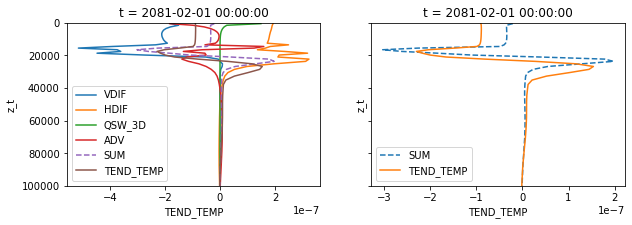

In [73]:
subset_ctl1 = budget.isel(nlon=2, nlat=350, t=0)
subset_ctl2 = budget.isel(nlon_t=2, nlat_t=350, time=0)

fig, ax = plt.subplots(1, 2, figsize=(10, 3), sharey=True)

# plot individual components
subset_ctl2.VDIF.plot(y="z_t", ylim=(1000e2, 0), label="VDIF", ax=ax[0])
subset_ctl2.HDIF.plot(y="z_t", ylim=(1000e2, 0), label="HDIF", ax=ax[0])
subset_ctl2.QSW_3D.plot(y="z_t", ylim=(1000e2, 0), label="QSW_3D", ax=ax[0])
subset_ctl2.TOT_ADV.plot(y="z_t", ylim=(1000e2, 0), label="ADV", ax=ax[0])

# plot sum
(subset_ctl2.QSW_3D + subset_ctl2.HDIF + subset_ctl2.VDIF + subset_ctl2.TOT_ADV).plot(
    y="z_t", ylim=(1000e2, 0), label="SUM", ls="--", ax=ax[0]
)
# plot tendency
subset_ctl1.TEND_TEMP.plot(y="z_t", ylim=(1000e2, 0), label="TEND_TEMP", ax=ax[0])

ax[0].legend()

# plot sum
(subset_ctl2.QSW_3D + subset_ctl2.HDIF + subset_ctl2.VDIF + subset_ctl2.TOT_ADV).plot(
    y="z_t", ylim=(1000e2, 0), label="SUM", ls="--", ax=ax[1]
)
# plot tendency
subset_ctl1.TEND_TEMP.plot(y="z_t", ylim=(1000e2, 0), label="TEND_TEMP", ax=ax[1])

ax[1].legend()

In [67]:
subset_ctl1.TEND_TEMP

<xarray.DataArray 'TEND_TEMP' (t: 12, z_t: 60)>
array([[ 7.08632999e-10,  2.57624520e-09,  5.94795486e-09,
         2.01435001e-07,  3.47506117e-07, -2.76322718e-07,
        -3.24056472e-07, -2.61008004e-07, -1.87819387e-07,
        -1.09757906e-07, -4.35047679e-08,  3.90300044e-09,
         3.28384800e-08,  5.23100665e-08,  6.68977514e-08,
         6.39101605e-08,  4.22103905e-08, -8.94805531e-10,
        -4.85409925e-08, -7.44863057e-08, -7.43582661e-08,
        -6.08434648e-08, -4.76461870e-08, -3.87812838e-08,
        -3.35044331e-08, -3.01680447e-08, -2.76105639e-08,
        -2.50122429e-08, -2.20673320e-08, -1.89664187e-08,
        -1.59269498e-08, -1.28771788e-08, -9.44439276e-09,
        -4.87580711e-09,  1.78924313e-09,  1.06269195e-08,
         1.94496947e-08,  2.51001782e-08,  2.63756072e-08,
         2.27858991e-08,  1.44195409e-08,  5.07062600e-09,
        -7.54624237e-10, -2.42612980e-09, -1.56149452e-09,
        -5.20620817e-11,  7.40642901e-10,  4.69938472e-10,
        -3.69953521e-10, -9.95986256e-10, -8.75121281e-10,
        -1.75594548e-10,  5.24852011e-10,  7.98499879e-10,
         5.88135955e-10,  3.23502370e-10,  3.33436477e-10,
         1.74674723e-10,             nan,             nan],
...
       [ 2.52508087e-07,  2.50642682e-07,  2.40278097e-07,
        -1.35817646e-08, -7.86430306e-07, -7.82918783e-07,
        -7.09877338e-07, -7.82897443e-07, -7.09084081e-07,
        -4.77968175e-07, -2.30997433e-07, -5.15830370e-08,
         3.69408984e-08,  7.21503187e-08,  7.95935407e-08,
         7.27242894e-08,  5.49893320e-08, -2.25246688e-09,
        -1.14738205e-07, -2.17853505e-07, -2.54604919e-07,
        -2.35438347e-07, -1.99474670e-07, -1.68893440e-07,
        -1.46773126e-07, -1.31225880e-07, -1.19940734e-07,
        -1.10715260e-07, -1.01663080e-07, -9.12900324e-08,
        -7.87818873e-08, -6.45996612e-08, -5.01510538e-08,
        -3.67006402e-08, -2.42892607e-08, -1.21074694e-08,
         3.03726137e-10,  1.20441855e-08,  2.04546952e-08,
         2.24987298e-08,  1.86441121e-08,  1.24343751e-08,
         6.61887504e-09,  2.46089918e-09,  3.04645962e-10,
        -5.13814114e-10, -8.92230022e-10, -1.51255984e-09,
        -2.14236386e-09, -1.97293214e-09, -1.03940198e-09,
        -2.15330977e-10,  1.36042083e-10,  3.49901341e-10,
         4.07850301e-10,  2.50100354e-10,  2.01441624e-10,
         1.15438008e-10,             nan,             nan]])
Coordinates:
    time     object 2081-02-01 00:00:00
  * z_t      (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
  * t        (t) object 2081-02-01 00:00:00 ... 2082-01-01 00:00:00

In [60]:
subset_ctl = budget.isel(nlon_t=31, nlat_t=190, time=0)
subset_ctl.VDIF

<xarray.DataArray 'VDIF' (z_t: 60)>
array([-3.65103993e-06, -6.09284798e-07, -1.04995589e-07,  7.67002882e-07,
        8.49155913e-09,  2.16476656e-09, -1.87730802e-09,  2.90005119e-10,
        4.55060581e-09,  6.93898528e-09,  5.91221760e-09,  3.39331575e-09,
        2.83856127e-09,  7.03917135e-09,  1.89098500e-09, -6.94803975e-09,
       -3.99269270e-09, -1.85693228e-09, -1.97940904e-09, -1.29299223e-09,
       -3.12993892e-09, -2.73818927e-09,  3.00840162e-10,  2.13024467e-09,
        2.23821246e-09,  1.42612386e-09,  5.57412071e-10,  1.13426466e-10,
        4.96618477e-11,  5.10537406e-11,  5.38805167e-11,  5.16667857e-11,
        4.45713107e-11,  3.55208922e-11,  2.75080464e-11,  2.15636192e-11,
        1.68216345e-11,  1.25792516e-11,  9.36828412e-12,  7.66219746e-12,
        6.41637795e-12,  5.04564002e-12,  3.54551436e-12,  1.99828081e-12,
        7.10113431e-13,  1.91462913e-13,  2.82198675e-13,  4.19874737e-13,
        3.53936918e-13,  1.41580314e-13, -1.03855553e-12, -1.20569638e-11,
       -9.13028378e-12, -9.61734492e-13,  4.64807710e-12,  7.25480657e-12,
        5.07477320e-12,  9.37324343e-12,             nan,             nan])
Coordinates:
    time     object 2081-02-01 00:00:00
    nlon_t   float64 31.5
    nlat_t   float64 190.5
  * z_t      (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
    TLONG    float64 355.4
    TLAT     float64 0.9335